# Machine Learning Model on determining the quality of Red Wine

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#acquiring the data
red_wine_df=pd.read_csv("winequality-red.csv")

In [3]:
#analysing the data
print(red_wine_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [4]:
#previewing the data
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#previewing the data
red_wine_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
644,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5
405,8.7,0.31,0.46,1.4,0.059,11.0,25.0,0.99660,3.36,0.76,10.1,6
825,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5
1219,9.0,0.39,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9,6


In [6]:
#class distribution
red_wine_df.groupby("quality").size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [7]:
#checking the structure of the dataset
red_wine_df.shape

(1599, 12)

In [8]:
#checking for the datatypes of all the fields
red_wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
#extracting the general information from the dataset
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#checking if any null values present in the dataset
red_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

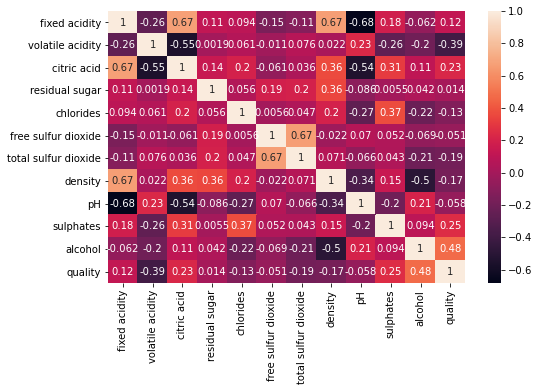

In [11]:
#checking for the correlation
corr_hmap=red_wine_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_hmap,annot=True)

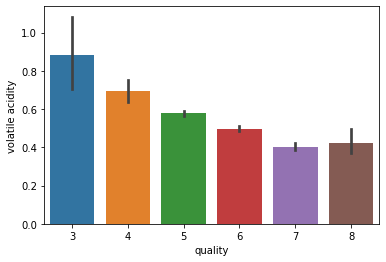

In [12]:
sns.barplot(data=red_wine_df,x='quality',y='volatile acidity')

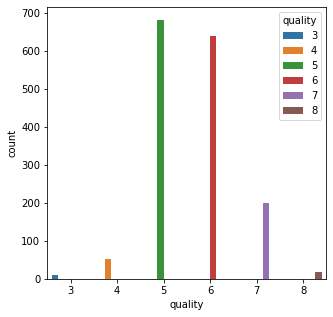

In [13]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=red_wine_df,x=red_wine_df["quality"],hue='quality')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000880486B7C0>,
      dtype=object)

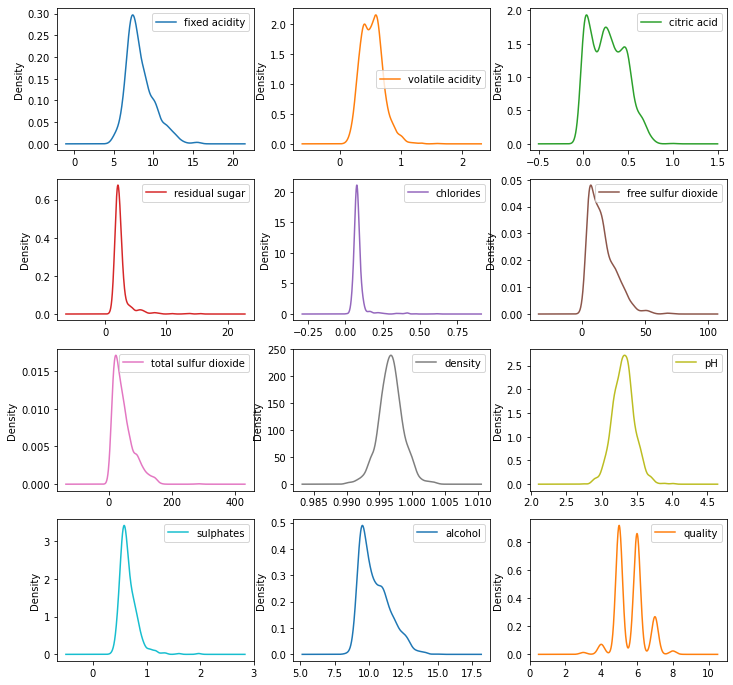

In [14]:
#multiplot visualization
red_wine_df.plot(kind='density', subplots=True, layout=(4,3),legend=True,sharex=False,figsize=(12,12))

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

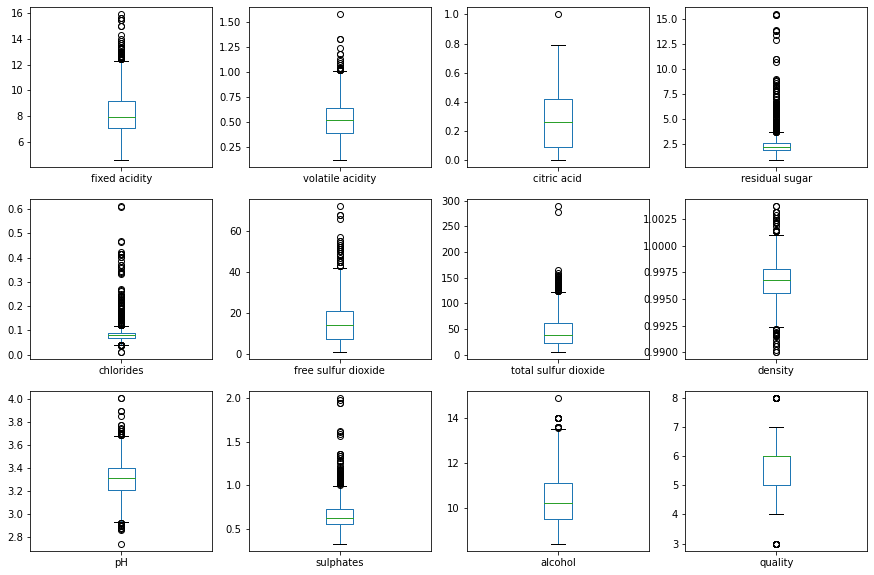

In [15]:
#checking for the outliers
red_wine_df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,10))

In [16]:
#checking the skewness before removing the outliers
red_wine_df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [17]:
#dropping off the columns those are not required
#red_wine_df.drop(['volatile acidity'],axis=1,inplace=True)
#red_wine_df.drop(['citric acid'],axis=1,inplace=True)

In [18]:
#removing outliers
z_score=np.abs(zscore(red_wine_df))
print(red_wine_df.shape)
red_wine_df_final=red_wine_df.loc[(z_score<3).all(axis=1)]
print(red_wine_df_final.shape)

(1599, 12)
(1451, 12)


In [19]:
#checking the skewness after removing the outliers
red_wine_df_final.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [20]:
#checking for the statastical report
red_wine_df_final.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [21]:
#Now separating input and output variable
print(red_wine_df_final.dtypes)
x=red_wine_df_final.drop(['quality'],axis=1)
y=red_wine_df_final.select_dtypes(include=['int64']).copy()
print(x.shape)
print(y.shape)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
(1451, 11)
(1451, 1)


In [22]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.55292997,  1.05091371, -1.39039974, ...,  1.37589608,
        -0.63645843, -0.99985592],
       [-0.3099004 ,  2.11933582, -1.39039974, ..., -0.8219512 ,
         0.2883529 , -0.6081737 ],
       [-0.3099004 ,  1.40705441, -1.18083057, ..., -0.3965614 ,
         0.05715007, -0.6081737 ],
       ...,
       [-1.22126131, -0.07686519, -0.70929993, ...,  0.73781138,
         0.82782618,  0.56687296],
       [-1.46429088,  0.72445139, -0.76169222, ...,  1.80128587,
         0.51955574, -0.21649148],
       [-1.40353349, -1.26400088,  1.07203802, ...,  0.52511649,
         0.13421768,  0.56687296]])

In [24]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [25]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,151):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.5068493150684932
random state:  43  accuracy score:  0.636986301369863
random state:  44  accuracy score:  0.6575342465753424
random state:  45  accuracy score:  0.6506849315068494
random state:  46  accuracy score:  0.589041095890411
random state:  47  accuracy score:  0.6164383561643836
random state:  48  accuracy score:  0.6232876712328768
random state:  49  accuracy score:  0.6438356164383562
random state:  50  accuracy score:  0.6917808219178082
random state:  51  accuracy score:  0.6506849315068494
random state:  52  accuracy score:  0.6232876712328768
random state:  53  accuracy score:  0.6575342465753424
random state:  54  accuracy score:  0.6164383561643836
random state:  55  accuracy score:  0.5684931506849316
random state:  56  accuracy score:  0.5753424657534246
random state:  57  accuracy score:  0.6164383561643836
random state:  58  accuracy score:  0.5273972602739726
random state:  59  accuracy score:  0.6301369863013698
random st

random state:  83  accuracy score:  0.547945205479452
random state:  84  accuracy score:  0.5136986301369864
random state:  85  accuracy score:  0.5342465753424658
random state:  86  accuracy score:  0.5342465753424658
random state:  87  accuracy score:  0.6095890410958904
random state:  88  accuracy score:  0.6232876712328768
random state:  89  accuracy score:  0.5547945205479452
random state:  90  accuracy score:  0.5753424657534246
random state:  91  accuracy score:  0.6301369863013698
random state:  92  accuracy score:  0.636986301369863
random state:  93  accuracy score:  0.4794520547945205
random state:  94  accuracy score:  0.4863013698630137
random state:  95  accuracy score:  0.6438356164383562
random state:  96  accuracy score:  0.6232876712328768
random state:  97  accuracy score:  0.5821917808219178
random state:  98  accuracy score:  0.6095890410958904
random state:  99  accuracy score:  0.547945205479452
random state:  100  accuracy score:  0.541095890410959
random state:

random state:  124  accuracy score:  0.6575342465753424
random state:  125  accuracy score:  0.6506849315068494
random state:  126  accuracy score:  0.6712328767123288
random state:  127  accuracy score:  0.6575342465753424
random state:  128  accuracy score:  0.6438356164383562
random state:  129  accuracy score:  0.6986301369863014
random state:  130  accuracy score:  0.6301369863013698
random state:  131  accuracy score:  0.6232876712328768
random state:  132  accuracy score:  0.6232876712328768
random state:  133  accuracy score:  0.6095890410958904
random state:  134  accuracy score:  0.6164383561643836
random state:  135  accuracy score:  0.6712328767123288
random state:  136  accuracy score:  0.6301369863013698
random state:  137  accuracy score:  0.6095890410958904
random state:  138  accuracy score:  0.6438356164383562
random state:  139  accuracy score:  0.5684931506849316
random state:  140  accuracy score:  0.6712328767123288
random state:  141  accuracy score:  0.589041095

random state:  52  accuracy score:  0.6164383561643836
random state:  53  accuracy score:  0.6986301369863014
random state:  54  accuracy score:  0.6095890410958904
random state:  55  accuracy score:  0.5821917808219178
random state:  56  accuracy score:  0.589041095890411
random state:  57  accuracy score:  0.6301369863013698
random state:  58  accuracy score:  0.5958904109589042
random state:  59  accuracy score:  0.6643835616438356
random state:  60  accuracy score:  0.6232876712328768
random state:  61  accuracy score:  0.6232876712328768
random state:  62  accuracy score:  0.636986301369863
random state:  63  accuracy score:  0.6575342465753424
random state:  64  accuracy score:  0.6164383561643836
random state:  65  accuracy score:  0.678082191780822
random state:  66  accuracy score:  0.636986301369863
random state:  67  accuracy score:  0.6917808219178082
random state:  68  accuracy score:  0.684931506849315
random state:  69  accuracy score:  0.678082191780822
random state:  7

In [26]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.6045977011494252
Cross Validation Score(Std):  0.04255461571468142

Model name:  KNN
Cross Validation Score(Mean):  0.5793103448275863
Cross Validation Score(Std):  0.03352435686471626

Model name:  DT
Cross Validation Score(Mean):  0.6352490421455939
Cross Validation Score(Std):  0.051483761018362675

Model name:  GNB
Cross Validation Score(Mean):  0.5785440613026821
Cross Validation Score(Std):  0.047608351163246174

Model name:  SVC
Cross Validation Score(Mean):  0.6306513409961687
Cross Validation Score(Std):  0.04801364045308979



In [28]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression())",70.547945,60.459770
1,"(KNN, KNeighborsClassifier())",68.493151,57.931034
2,"(DT, DecisionTreeClassifier())",72.602740,63.524904
3,"(GNB, GaussianNB())",67.808219,57.854406
4,"(SVC, SVC())",73.287671,63.065134


In [29]:
# Boosting methods
boosters=[]
boosters.append(('AB', AdaBoostClassifier()))
boosters.append(('GBM', GradientBoostingClassifier()))
boosters.append(('RF', RandomForestClassifier()))
boosters.append(('ET', ExtraTreesClassifier()))

In [30]:
results = []
names = []
for name, model in boosters:
    cv_results = cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_results)
    names.append(name)    
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_results.mean())
    print("Cross Validation Score(Std): ",cv_results.std())
    print()

Model name:  AB
Cross Validation Score(Mean):  0.31340996168582375
Cross Validation Score(Std):  0.07846084742479818

Model name:  GBM
Cross Validation Score(Mean):  0.6421455938697318
Cross Validation Score(Std):  0.06251671434290006

Model name:  RF
Cross Validation Score(Mean):  0.7072796934865899
Cross Validation Score(Std):  0.055975424881991344

Model name:  ET
Cross Validation Score(Mean):  0.7088122605363983
Cross Validation Score(Std):  0.057496801478326656



In [32]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=127,test_size=0.10)
model_name=SVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.7328767123287672
confusion matrix: 
[[ 0  6  0  0  0]
 [ 0 50  7  0  0]
 [ 0 14 44  3  0]
 [ 0  1  7 13  0]
 [ 0  0  0  1  0]]
classification report: 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.88      0.78        57
           6       0.76      0.72      0.74        61
           7       0.76      0.62      0.68        21
           8       0.00      0.00      0.00         1

    accuracy                           0.73       146
   macro avg       0.45      0.44      0.44       146
weighted avg       0.70      0.73      0.71       146

[6 6 5 6 5 7 6 6 7 5 6 5 6 5 6 5 6 5 7 6 5 6 5 5 5 5 5 6 6 5 5 6 5 5 5 6 6
 5 6 6 6 5 5 6 6 7 6 6 5 6 7 5 6 7 6 5 7 6 5 6 5 5 7 5 6 7 5 5 6 6 5 6 5 5
 5 5 5 5 6 6 6 6 5 5 6 6 5 5 7 6 5 7 6 5 5 6 6 5 6 5 6 5 6 7 5 5 5 5 7 6 5
 7 5 6 5 7 5 5 5 5 7 5 5 6 6 5 6 6 5 6 5 5 6 5 6 5 6 5 6 5 5 7 6 6 5 5]


In [33]:
#saving the model as pickle in a file
pickle.dump(model_name,open('svc_red_wine_data.pkl','wb'))

In [34]:
#loading the model for testing
loaded_model=pickle.load(open('svc_red_wine_data.pkl','rb'))
loaded_model.predict(x_test)

array([6, 6, 5, 6, 5, 7, 6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 6, 5, 7, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,
       6, 7, 6, 6, 5, 6, 7, 5, 6, 7, 6, 5, 7, 6, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5,
       7, 6, 5, 7, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 7, 6,
       5, 7, 5, 6, 5, 7, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 5], dtype=int64)